## Plot importand bands

In [1]:

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_color_gradients(features_rang):
	fig, ax = plt.subplots(nrows=1, figsize=(13, 1))
	fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
	# ax.set_title("Relavant features", fontsize=14)

	w_start, w_stop = 410, 988

	cmap = cm.get_cmap('Greens', 8)
	cmap.set_under("white")
	gradient = np.vstack((features_rang, features_rang))
	ax.imshow(gradient, aspect='auto', cmap=cmap,
				extent=[w_start, w_stop, 1, 0], vmin=1)

	ax.set_xlabel("Wavelength [nm]")
	ax.xaxis.label.set_size(12)
	ax.set_yticklabels([])
	plt.show()

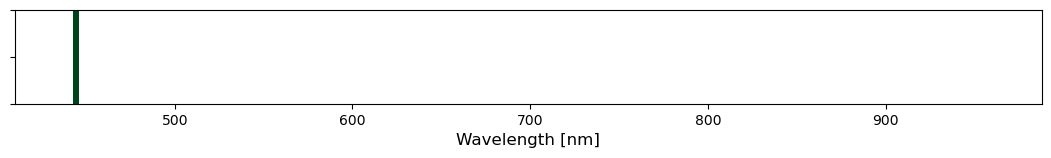

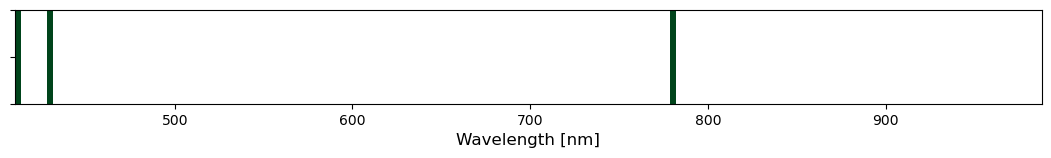

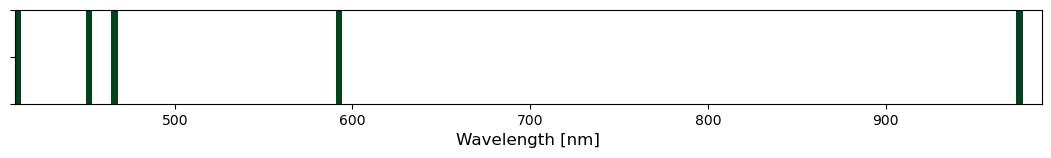

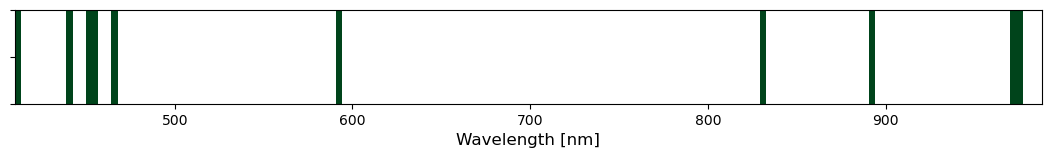

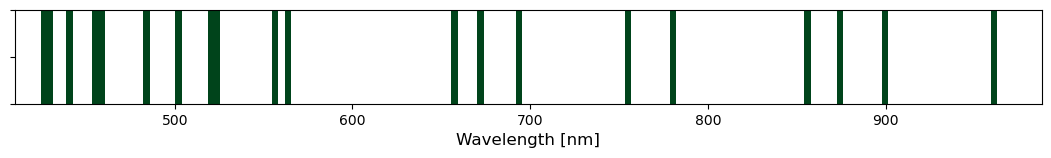

In [3]:

lda_1_bands = [1]
lda_3_bands = [11, 15, 50]
lda_5_bands = [11, 15, 18, 40, 108]
lda_10_bands = [4, 5, 8, 20, 25, 72, 81, 89, 95, 128]
lda_20_bands = [0, 2, 5, 21, 23, 30, 47, 68, 71, 75, 80, 81, 91, 114, 115, 116, 117, 125, 139, 144]

svm_1_bands = [1]
svm_3_bands = [11, 15, 50]
svm_5_bands = [11, 15, 18, 40, 108]
svm_10_bands = [4, 5, 8, 20, 25, 72, 81, 89, 95, 128]
svm_20_bands = [4, 5, 8, 16, 20, 25, 40, 42, 46, 55, 57, 60, 68, 79, 97, 102, 115, 119, 123, 139]

nn_1_bands = [9]
nn_3_bands = [0, 5, 102]
nn_5_bands = [0, 11, 15, 50, 156]
nn_10_bands = [0, 8, 11, 12, 15, 50, 116, 133, 155, 156]
nn_20_bands = [4, 5, 8, 12, 13, 20, 25, 30, 31, 40, 42, 68, 72, 78, 95, 102, 123, 128, 135, 152]

all_bands = [lda_1_bands, lda_3_bands, lda_5_bands, lda_10_bands, lda_20_bands]
all_bands = [svm_1_bands, svm_3_bands, svm_5_bands, svm_10_bands, svm_20_bands]
all_bands = [nn_1_bands, nn_3_bands, nn_5_bands, nn_10_bands, nn_20_bands]


for idx, bands in enumerate(all_bands):
	relevances = np.array([0] * 160)
	relevances[bands] = 10
	plot_color_gradients(relevances)

## Plot importand bands

In [5]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.collections import LineCollection
from matplotlib.lines import Line2D
from sklearn import preprocessing

In [6]:

def plot_methods_acc(signatures, labels, *, no_sensors_list, title="", x_label="", y_label="", vertical_lines=None):
	""" Plot signatures with corresponding wavelenght or consequtive wavelength number
	Args:
		signatures (list): list of lists/signatures
		labels (list): list of labels
	"""
	transformer = preprocessing.LabelEncoder()
	transformer.fit(labels)
	labels = transformer.transform(labels)

	fig = plt.figure() 
	fig.set_figheight(5)
	fig.set_figwidth(15)

	ax = fig.add_subplot(1, 1, 1)
	ax.set_title(title, fontsize=14)
	ax.set_ylabel(y_label, fontsize=12)
	ax.set_xlabel(x_label, fontsize=12)
	ax.tick_params(axis='both', which='major', labelsize=22)
	ax.tick_params(axis='both', which='minor', labelsize=22)
	ax.spines['top'].set_visible(False)
	ax.spines['right'].set_visible(False)
	ax.set_ylim(0.7, 0.9)

	cmap = plt.get_cmap('viridis')
	no_colors = len(np.unique(labels))
	colors = cmap(np.linspace(0, 1, no_colors))

	x_scat = list(np.arange(len(signatures[0])))

	def format_func(value, tick_number):
		if tick_number is not None:
			if tick_number < len(no_sensors_list):
				return str(no_sensors_list[int(tick_number)])
			else:
				return ""

	ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

	for obj in range(len(signatures)):
		ax.plot(x_scat, signatures[obj], "-gD", color=colors[labels[obj]], alpha=0.7)

	custom_lines = []
	for idx in range(no_colors):
		custom_lines.append(Line2D([0], [0], color=colors[idx], lw=2))

	labels = transformer.inverse_transform(list(range(no_colors)))
	ax.legend(custom_lines, [str(num) for num in labels], fontsize=30)
	plt.show()

C:\Users\janezla\AppData\Local\Temp\ipykernel_26208\3928240881.py:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-gD" (-> color='g'). The keyword argument will take precedence.
  ax.plot(x_scat, signatures[obj], "-gD", color=colors[labels[obj]], alpha=0.7)


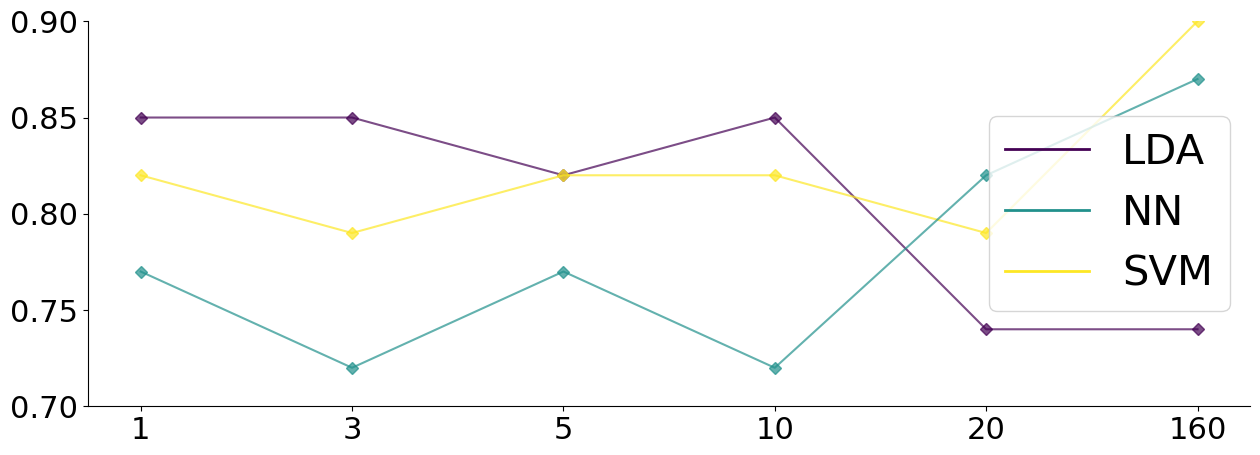

In [7]:
acc_dict = {
	"LDA": [0.85, 0.85, 0.82, 0.85, 0.74, 0.74],
	"SVM": [0.82, 0.79, 0.82, 0.82, 0.79, 0.90],
	"NN": [0.77, 0.72, 0.77, 0.72, 0.82, 0.87],
}
no_sensors_list = [1, 1, 3, 5, 10, 20, 160]
kwargs = {
	"no_sensors_list": no_sensors_list,
	# "title": "Accuracy on train data at different numbers of sensors",
	# "x_label": "Number of sensors",
	# "y_label": "Accuracy"
}
plot_methods_acc(list(acc_dict.values()), list(acc_dict.keys()), **kwargs)